# Importation des bibliothèques nécessaire

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import optuna

import xgboost as xgb

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Reshape
from tensorflow.keras import Sequential
import time
from tqdm import tqdm



Nous enlevons les avertissements

In [19]:
import warnings
warnings.filterwarnings('ignore')

# Visualisation et exploration des données

In [20]:
# Lecture des données
df = pd.read_csv("Projet_MLOps.csv", sep=';')

In [21]:
# Visualisation des données
df

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,001068c415025a009fee375a12cff4fcnht8y,7179832,4ifac,jewelry,phone561,5.140996e-308,bn,139.226.147.115,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228iiasc,a3d2de7675556553a5f08e4c88d2c2282aj35,0
1,0030a2dd87ad2733e0873062e4f83954mkj86,6805028,obbny,mobile,phone313,5.139226e-308,ir,21.67.17.162,vnw40k8zzokijsv,a3d2de7675556553a5f08e4c88d2c228jem8t,f3bc67b04b43c3cebd1db5ed4941874c9br67,0
2,00a0517965f18610417ee784a05f494d4dw6e,2501797,l3o6q,books and music,phone451,5.067829e-308,bh,103.165.41.136,kk7rxe25ehseyci,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0
3,00a0517965f18610417ee784a05f494d4dw6e,2724778,du967,books and music,phone117,5.068704e-308,tr,239.250.228.152,iu2iu3k137vakme,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0
4,00a0517965f18610417ee784a05f494d4dw6e,2742648,wx3kf,books and music,phone16,5.068805e-308,in,255.108.248.101,u85yj2e7owkz6xp,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0ad17aa9111f657d71cd3005599afc24fd44y,1411172,toxfq,mobile,phone1036,5.201503e-308,in,186.94.48.203,vasstdc27m7nks3,22cdb26663f071c00de61cc2dcde7b556rido,db147bf6056d00428b1bbf250c6e97594ewjy,1
99996,0ad17aa9111f657d71cd3005599afc24fd44y,1411587,ucb4u,mobile,phone127,5.201506e-308,in,119.27.26.126,vasstdc27m7nks3,22cdb26663f071c00de61cc2dcde7b556rido,db147bf6056d00428b1bbf250c6e97594ewjy,1
99997,0ad17aa9111f657d71cd3005599afc24fd44y,1411727,sg8yd,mobile,phone383,5.201507e-308,in,243.25.54.63,yweo7wfejrgbi2d,22cdb26663f071c00de61cc2dcde7b556rido,db147bf6056d00428b1bbf250c6e97594ewjy,1
99998,0ad17aa9111f657d71cd3005599afc24fd44y,1411877,toaj7,mobile,phone26,5.201508e-308,in,17.66.120.232,4dd8ei0o5oqsua3,22cdb26663f071c00de61cc2dcde7b556rido,db147bf6056d00428b1bbf250c6e97594ewjy,1


La méthode info() imprime des informations sur le DataFrame. Les informations contiennent le nombre de colonnes, les étiquettes de colonne, les types de données de colonne, l'utilisation de la mémoire, l'index de plage et le nombre de cellules dans chaque colonne (valeurs non nulles).

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   bidder_id        100000 non-null  object 
 1   bid_id           100000 non-null  int64  
 2   auction          100000 non-null  object 
 3   merchandise      100000 non-null  object 
 4   device           100000 non-null  object 
 5   time             100000 non-null  float64
 6   country          99816 non-null   object 
 7   ip               100000 non-null  object 
 8   url              100000 non-null  object 
 9   payment_account  100000 non-null  object 
 10  address          100000 non-null  object 
 11  outcome          100000 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 9.2+ MB


On remarque qu'il y'as des Nan Values dans la colonne Country. Regardons le pourcentage des valeurs manquantes dans cette colonne. 

In [23]:
df.isnull().sum()

bidder_id            0
bid_id               0
auction              0
merchandise          0
device               0
time                 0
country            184
ip                   0
url                  0
payment_account      0
address              0
outcome              0
dtype: int64

In [24]:
df.head()

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,001068c415025a009fee375a12cff4fcnht8y,7179832,4ifac,jewelry,phone561,5.140996e-308,bn,139.226.147.115,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228iiasc,a3d2de7675556553a5f08e4c88d2c2282aj35,0
1,0030a2dd87ad2733e0873062e4f83954mkj86,6805028,obbny,mobile,phone313,5.139226e-308,ir,21.67.17.162,vnw40k8zzokijsv,a3d2de7675556553a5f08e4c88d2c228jem8t,f3bc67b04b43c3cebd1db5ed4941874c9br67,0
2,00a0517965f18610417ee784a05f494d4dw6e,2501797,l3o6q,books and music,phone451,5.067829e-308,bh,103.165.41.136,kk7rxe25ehseyci,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0
3,00a0517965f18610417ee784a05f494d4dw6e,2724778,du967,books and music,phone117,5.068704e-308,tr,239.250.228.152,iu2iu3k137vakme,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0
4,00a0517965f18610417ee784a05f494d4dw6e,2742648,wx3kf,books and music,phone16,5.068805e-308,in,255.108.248.101,u85yj2e7owkz6xp,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0


In [25]:
missing_percent = df['country'].isnull().mean()
print(f"Pourcentage des données manquantes: {missing_percent*100: .2f}%")

Pourcentage des données manquantes:  0.18%


Nous remarquons que seulement une petite proportion des données est manquante. Lorsque nous traitons de telles valeurs, nous pouvons soit supprimer la colonne entière, ce qui n'est pas une bonne option car la proportion des donénes manquantes est petite soit nous pouvons supprimer les valeurs par ligne ou soit nous pouvons remplacer les valeurs nan par une valeur pour garder les lignes intactes. 

Nous choising de garder les lignes et les informantions intactes et remplacer les valeurs manquantes par une certaine valeur.


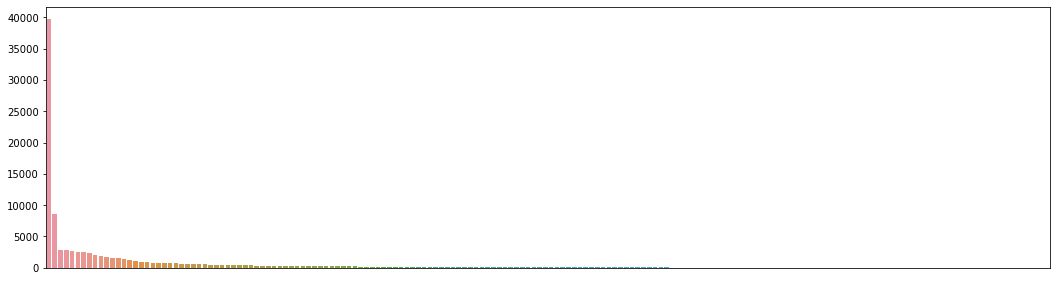

In [26]:
unique_countries = df['country'].value_counts()

fig, ax = plt.subplots(figsize = (18, 4.8))
countries_distribution = sns.barplot(x = unique_countries.index, y = unique_countries.values, ax = ax)                        
ax.get_xaxis().set_visible(False)

plt.show()

L'idée est soit de remplacer les valeurs manquantes par une nouvelle catégorie par exemple "other" soit de la remplacer par la valeur la plus fréquente. En visualisant la distribution des valeurs uniques de la colonne country, nous remarquons qu'il y a un pays qui est significativement plus fréquent que les autres. En conséquence, la méthode mode imputation serait le bon choix.

In [27]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

Vérifions qu'il n'y a plus de valeurs manquantes

In [28]:
df.isnull().sum()

bidder_id          0
bid_id             0
auction            0
merchandise        0
device             0
time               0
country            0
ip                 0
url                0
payment_account    0
address            0
outcome            0
dtype: int64

Essayons de voir tout d'abord combien de valeurs uniques sur chaque colonne du dataset

In [29]:
def count_unique(df):
    for col in df.columns:
        print("For the {} column there's {} unique value out of {} values".format(col,len(df[col].unique()),len(df[col])))
        
count_unique(df)        
        
        

For the bidder_id column there's 87 unique value out of 100000 values
For the bid_id column there's 100000 unique value out of 100000 values
For the auction column there's 3438 unique value out of 100000 values
For the merchandise column there's 6 unique value out of 100000 values
For the device column there's 1871 unique value out of 100000 values
For the time column there's 92385 unique value out of 100000 values
For the country column there's 174 unique value out of 100000 values
For the ip column there's 50309 unique value out of 100000 values
For the url column there's 21951 unique value out of 100000 values
For the payment_account column there's 87 unique value out of 100000 values
For the address column there's 87 unique value out of 100000 values
For the outcome column there's 2 unique value out of 100000 values


Nous remarquons que chaque bidder a un compte de paiement unique et une adresse unique. Ces deux colonnes nous aideront pas à géneraliser et à catégoriser les bidders. Nous décidons de les supprimer.

In [30]:
df.drop(['payment_account',"address"], axis =1, inplace=True)

# Feature engineering

Essayons de transformer ces données brutes en des features pour qu'il soient traités par le machine learning

Voyons pour chaque enchérisseur combien d'enchère il a participé et combien d'offre il a proposé

In [31]:
# Cette fonction permet de récuperer pour chaque enchérisseur combien d'enchère il a participté et combien d'offre (bid) il a proposé et sauvegarder ces informations dans une dataframe pandas
def get_unique_df(df):
    df_unique = df.groupby("bidder_id").nunique().reset_index()
    df_unique.drop(["outcome"],axis=1,inplace = True)
    df_unique = df_unique.rename(columns={"bid_id" : "n_bids","auction" : "n_auctions", "merchandise":"n_merchandise", "device":"n_device","time":"n_time", "country":"n_country","ip":"n_ip","url":"n_url" })
    return df_unique

In [32]:
# Visualisation des premiers éléments de cette dataframe
df_unique = get_unique_df(df)
df_unique.head()

,bidder_id,n_bids,n_auctions,n_merchandise,n_device,n_time,n_country,n_ip,n_url
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1
1,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1
2,00a0517965f18610417ee784a05f494d4dw6e,141,74,1,67,141,16,103,84
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,3,1,3,3,2,3,1
4,01067975436d123f717ee5aba0dd4bbfa0937,543,17,1,165,543,71,398,4


Essayons de regrouper et renommer ces nouvelles features dans notre dataframe de départ

In [33]:
# fonction pour fusionner les dataframes
def merge_data(df,new_feat):
    outcome = df[["bidder_id","outcome"]]
    data = outcome.merge(new_feat , on='bidder_id' , how='left')
    data = data.drop_duplicates()
    data.reset_index(drop=True , inplace=True)
    data = data.rename(columns={"bid_id" : "n_bids","auction" : "n_auctions", "merchandise":"n_merchandise", "device":"n_device","time":"n_time", "country":"n_country","ip":"n_ip","url":"n_url" })
    return data

In [34]:
data = merge_data(df,df_unique)
data.head()

,bidder_id,outcome,n_bids,n_auctions,n_merchandise,n_device,n_time,n_country,n_ip,n_url
0,001068c415025a009fee375a12cff4fcnht8y,0,1,1,1,1,1,1,1,1
1,0030a2dd87ad2733e0873062e4f83954mkj86,0,1,1,1,1,1,1,1,1
2,00a0517965f18610417ee784a05f494d4dw6e,0,141,74,1,67,141,16,103,84
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0,3,3,1,3,3,2,3,1
4,01067975436d123f717ee5aba0dd4bbfa0937,0,543,17,1,165,543,71,398,4


On créera de nouvelle features à base de ces derniers. Par exemple on peut prendre le pourcentage des bids par nombre d'auctions ect ...

In [35]:
def new_features(data):
    data['bids_per_auct'] = data['n_bids'] / data['n_auctions']
    data['bids_per_device'] = data['n_bids'] / data['n_device']
    data['bids_per_url'] = data['n_bids'] / data['n_url']
    data['device_per_auct'] = data['n_device'] / data['n_auctions']
    data['ip_per_ctry'] = data['n_ip'] / data['n_country']
    data = data.fillna(0)
    return data

In [36]:
data = new_features(data)
data.head()

,bidder_id,outcome,n_bids,n_auctions,n_merchandise,n_device,n_time,n_country,n_ip,n_url,bids_per_auct,bids_per_device,bids_per_url,device_per_auct,ip_per_ctry
0,001068c415025a009fee375a12cff4fcnht8y,0,1,1,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.000000,1.000000
1,0030a2dd87ad2733e0873062e4f83954mkj86,0,1,1,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.000000,1.000000
2,00a0517965f18610417ee784a05f494d4dw6e,0,141,74,1,67,141,16,103,84,1.905405,2.104478,1.678571,0.905405,6.437500
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0,3,3,1,3,3,2,3,1,1.000000,1.000000,3.000000,1.000000,1.500000
4,01067975436d123f717ee5aba0dd4bbfa0937,0,543,17,1,165,543,71,398,4,31.941176,3.290909,135.750000,9.705882,5.605634


Essayons de voir la distribution des robots par rapport au nombre des bids. Nous remarquons que les robots ont généralement beacoup de bids. Ceci pourrait être une caractéristiques que les modèles se baseront pour juger si c'est un robot ou non. 

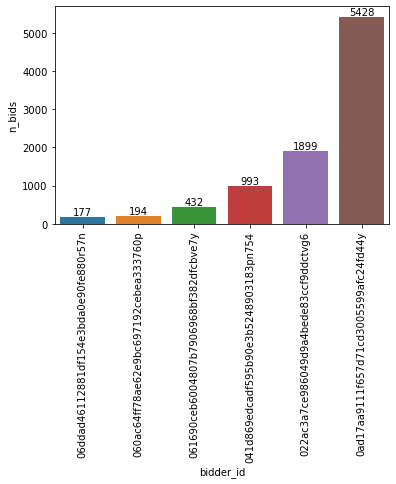

In [37]:
fig, ax = plt.subplots()
num_bids_per_bot = sns.barplot(data = data[data['outcome'] == 1].sort_values('n_bids').head(10),
                               x = 'bidder_id',
                               y = 'n_bids',
                               ax = ax
                              )
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

plt.show()

La colonne Time connait des valeurs très petite d'ordre de grandeur 1.10^^-308. On multiplie la colonne time par 10^^308 pour la standariser.

In [38]:
# Cette fonction sert à tout simplement multiplier la colonne time du dataframe par 10^^308
def standarize_time(df):
    df_time = df.sort_values(['bidder_id','time'])
    df_time['time'] = df_time['time']*1e+308
    return df_time

In [39]:
# Standarisation de la colonne time et visualisation des données
df_time = standarize_time(df)
df_time.head()

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url,outcome
0,001068c415025a009fee375a12cff4fcnht8y,7179832,4ifac,jewelry,phone561,5.140996,bn,139.226.147.115,vasstdc27m7nks3,0
1,0030a2dd87ad2733e0873062e4f83954mkj86,6805028,obbny,mobile,phone313,5.139226,ir,21.67.17.162,vnw40k8zzokijsv,0
2,00a0517965f18610417ee784a05f494d4dw6e,2501797,l3o6q,books and music,phone451,5.067829,bh,103.165.41.136,kk7rxe25ehseyci,0
3,00a0517965f18610417ee784a05f494d4dw6e,2724778,du967,books and music,phone117,5.068704,tr,239.250.228.152,iu2iu3k137vakme,0
4,00a0517965f18610417ee784a05f494d4dw6e,2742648,wx3kf,books and music,phone16,5.068805,in,255.108.248.101,u85yj2e7owkz6xp,0


Nous pouvons générer des features en examinant la différence de temps entre deux offres pour chaque bidder. Nous ne pouvons pas prendre la première différence de la première offre de chaque soumissionnaire, il y a donc des valeurs manquantes. Comme ces valeurs manquantes n'ont pas d'interprétation, nous les abandonnons.

In [40]:
# Cette fonction génère les features de la différence de temps entre deux offres pour chaque bidder
def get_first_diff(df_time):
    diff = df_time.groupby("bidder_id")[["time"]].diff()
    df_time['first_diff'] = diff
    firstdiff_feat = df_time[['bidder_id', 'first_diff']]
    firstdiff_feat.dropna(inplace=True)
    return firstdiff_feat

In [41]:
firstdiff_feat = get_first_diff(df_time)
firstdiff_feat.head()

,bidder_id,first_diff
3,00a0517965f18610417ee784a05f494d4dw6e,0.000875
4,00a0517965f18610417ee784a05f494d4dw6e,0.000101
5,00a0517965f18610417ee784a05f494d4dw6e,0.000861
6,00a0517965f18610417ee784a05f494d4dw6e,0.000443
7,00a0517965f18610417ee784a05f494d4dw6e,0.005417


Nous pouvons générer certaines features en utilisant des fonctions d'agrégation courantes telles que la moyenne, la médiane, le minimum et le maximum.

In [42]:
# Cette fonction permet de générer les features moyennne, médiane, minimum et max à partir de la différence de temps
def get_bid_intervals(firstdiff_feat):
    bid_intervals = firstdiff_feat.groupby('bidder_id')[['first_diff']].describe().reset_index()
    bid_intervals = bid_intervals.droplevel(axis=1, level=0)
    bid_intervals = bid_intervals.rename(columns = {'': 'bidder_id', 'mean': 'mean_diff', 'std': 'std_diff', '50%': 'median_diff', 'min': 'min_diff', 'max': 'max_diff'}).fillna(0)
    bid_intervals['iqr_diff'] = bid_intervals['75%'] - bid_intervals['25%']
    bid_intervals = bid_intervals.drop(['25%', '75%', 'count'], axis = 1)
    return bid_intervals

In [43]:
bid_intervals = get_bid_intervals(firstdiff_feat)
bid_intervals.head()

,bidder_id,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff
0,00a0517965f18610417ee784a05f494d4dw6e,0.000542,0.004200,5.200691e-07,0.000055,0.049530,0.000187
1,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0.027158,0.038331,5.341110e-05,0.027158,0.054262,0.027104
2,01067975436d123f717ee5aba0dd4bbfa0937,0.000025,0.000053,5.200691e-08,0.000014,0.000959,0.000024
3,012441119bcf83b23d4768bb72cea6d6carua,0.000556,0.000670,1.040138e-07,0.000470,0.002553,0.000656
4,01255c2c7c5578c186873422fc00fd7afwk8k,0.000205,0.000269,5.720760e-07,0.000112,0.001443,0.000236


Pour les features de différence de temps, nous remplissons les valeurs manquantes avec les valeurs médianes car nous n'avons pas ces informations.

In [44]:
# Cette fonction fusionne les nouvelles features avec le dataset 
def merge_bid_intervals(data):
    data = data.merge(bid_intervals, on='bidder_id', how='left')
    data = data.fillna(data.median())
    return data

In [45]:
data = merge_bid_intervals(data)
data.head()

,bidder_id,outcome,n_bids,n_auctions,n_merchandise,n_device,n_time,n_country,n_ip,n_url,...,bids_per_device,bids_per_url,device_per_auct,ip_per_ctry,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff
0,001068c415025a009fee375a12cff4fcnht8y,0,1,1,1,1,1,1,1,1,...,1.000000,1.000000,1.000000,1.000000,0.000468,0.000764,5.460726e-07,0.000113,0.004185,0.000182
1,0030a2dd87ad2733e0873062e4f83954mkj86,0,1,1,1,1,1,1,1,1,...,1.000000,1.000000,1.000000,1.000000,0.000468,0.000764,5.460726e-07,0.000113,0.004185,0.000182
2,00a0517965f18610417ee784a05f494d4dw6e,0,141,74,1,67,141,16,103,84,...,2.104478,1.678571,0.905405,6.437500,0.000542,0.004200,5.200691e-07,0.000055,0.049530,0.000187
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0,3,3,1,3,3,2,3,1,...,1.000000,3.000000,1.000000,1.500000,0.027158,0.038331,5.341110e-05,0.027158,0.054262,0.027104
4,01067975436d123f717ee5aba0dd4bbfa0937,0,543,17,1,165,543,71,398,4,...,3.290909,135.750000,9.705882,5.605634,0.000025,0.000053,5.200691e-08,0.000014,0.000959,0.000024


Une observation intéressante est que certains bidders ont un temps de latence nul entre deux offres. Intuitivement, les robots peuvent être en mesure d'atteindre cet objectif plus facilement qu'un humain moyen, et nous pouvons donc examiner les valeurs pour lesquelles la différence de temps est égale à 0.

In [46]:
# Cette fonction permet de générer les features dont lesquelles la différence de temps est égal à 0
def get_concurrent_bids(firstdiff_feat):
    concurrent_bids = firstdiff_feat[firstdiff_feat['first_diff'] == 0].groupby('bidder_id').count().reset_index()
    concurrent_bids = concurrent_bids.rename(columns = {'first_diff': 'num_concurrent_bids'})
    return concurrent_bids

In [47]:
concurrent_bids = get_concurrent_bids(firstdiff_feat)
concurrent_bids.head()

,bidder_id,num_concurrent_bids
0,022ac3a7ce986049d9a4bede83ccf9ddctvg6,325
1,0318e0a173f7c65db40116b903884c854x258,222
2,037d9f10da403d8d5f94b6e2957a3702f6x07,325
3,03a1e81cb7bcd15014489a6f752c9d5b7pvel,1
4,03aafab9868455b78f0723eda86698ba9v9rm,187


Lorsque nous ajoutons les features ci-dessus à nos ensembles de données t, nous remplissons les valeurs manquantes pour les offres simultanées par 0 simplement parce que les bidders n'en ont pas.

In [48]:
# Cette fonction permet de fussionner les features avec le dataset
def merge_concurrent_bids(data,concurrent_bids):
    data = data.merge(concurrent_bids, on='bidder_id', how='left').fillna(0)
    return data

In [49]:
data =  merge_concurrent_bids(data,concurrent_bids)
data.head()

,bidder_id,outcome,n_bids,n_auctions,n_merchandise,n_device,n_time,n_country,n_ip,n_url,...,bids_per_url,device_per_auct,ip_per_ctry,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff,num_concurrent_bids
0,001068c415025a009fee375a12cff4fcnht8y,0,1,1,1,1,1,1,1,1,...,1.000000,1.000000,1.000000,0.000468,0.000764,5.460726e-07,0.000113,0.004185,0.000182,0.0
1,0030a2dd87ad2733e0873062e4f83954mkj86,0,1,1,1,1,1,1,1,1,...,1.000000,1.000000,1.000000,0.000468,0.000764,5.460726e-07,0.000113,0.004185,0.000182,0.0
2,00a0517965f18610417ee784a05f494d4dw6e,0,141,74,1,67,141,16,103,84,...,1.678571,0.905405,6.437500,0.000542,0.004200,5.200691e-07,0.000055,0.049530,0.000187,0.0
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0,3,3,1,3,3,2,3,1,...,3.000000,1.000000,1.500000,0.027158,0.038331,5.341110e-05,0.027158,0.054262,0.027104,0.0
4,01067975436d123f717ee5aba0dd4bbfa0937,0,543,17,1,165,543,71,398,4,...,135.750000,9.705882,5.605634,0.000025,0.000053,5.200691e-08,0.000014,0.000959,0.000024,0.0


Le temps peut être utilisé pour indiquer le comportement d'un enchérisseur par rapport aux autres. La comparaison la plus simple est le nombre de fois où un bidder est le premier ou le dernier dans une enchère. Intuitivement, nous remplissons les valeurs manquantes avec 0.

In [50]:
# Cette fonction permet de générer le nombre de fois où un bidder est le premier dans une enchère
def get_first_bid(df):
    first_bid = df.sort_values(['auction', 'time'])
    first_bid = first_bid.groupby('auction').first().reset_index()
    first_bid = first_bid.groupby('bidder_id').count()['bid_id'].reset_index()
    first_bid = first_bid.rename(columns = {'bid_id': 'n_prem_bid'})
    return first_bid

In [51]:
first_bid = get_first_bid(df)
first_bid.head()

,bidder_id,n_prem_bid
0,00a0517965f18610417ee784a05f494d4dw6e,14
1,01067975436d123f717ee5aba0dd4bbfa0937,11
2,01255c2c7c5578c186873422fc00fd7afwk8k,3
3,01349288df20199905e719f0ff7ee771nwryj,2
4,0141844fc725a85e38e12cc02fcdbbe8ofqxv,4


In [52]:
# Cette fonction permet de générer le nombre de fois où un bidder est le dernier dans une enchère
def get_last_bid(df):
    last_bid = df.sort_values(['auction', 'time'], ascending = [True, False])
    last_bid = last_bid.groupby('auction').first().reset_index()
    last_bid = last_bid.groupby('bidder_id').count()['bid_id'].reset_index()
    last_bid = last_bid.rename(columns = {'bid_id': 'n_dernier_bid'})
    return last_bid


In [53]:
last_bid = get_last_bid(df)
last_bid.head()

,bidder_id,n_dernier_bid
0,001068c415025a009fee375a12cff4fcnht8y,1
1,00a0517965f18610417ee784a05f494d4dw6e,23
2,01067975436d123f717ee5aba0dd4bbfa0937,10
3,012441119bcf83b23d4768bb72cea6d6carua,3
4,01255c2c7c5578c186873422fc00fd7afwk8k,3


In [54]:
# Cette fonction permet de fusionner les features first_bid et last_bid avec le dataset
def merge_first_last_bid(data,first_bid,last_bid):
    data = data.merge(first_bid, on='bidder_id', how='left').fillna(0)
    data = data.merge(last_bid, on='bidder_id', how='left').fillna(0)
    return data

In [55]:
data = merge_first_last_bid(data,first_bid,last_bid)
data.head()

,bidder_id,outcome,n_bids,n_auctions,n_merchandise,n_device,n_time,n_country,n_ip,n_url,...,ip_per_ctry,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff,num_concurrent_bids,n_prem_bid,n_dernier_bid
0,001068c415025a009fee375a12cff4fcnht8y,0,1,1,1,1,1,1,1,1,...,1.000000,0.000468,0.000764,5.460726e-07,0.000113,0.004185,0.000182,0.0,0.0,1.0
1,0030a2dd87ad2733e0873062e4f83954mkj86,0,1,1,1,1,1,1,1,1,...,1.000000,0.000468,0.000764,5.460726e-07,0.000113,0.004185,0.000182,0.0,0.0,0.0
2,00a0517965f18610417ee784a05f494d4dw6e,0,141,74,1,67,141,16,103,84,...,6.437500,0.000542,0.004200,5.200691e-07,0.000055,0.049530,0.000187,0.0,14.0,23.0
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0,3,3,1,3,3,2,3,1,...,1.500000,0.027158,0.038331,5.341110e-05,0.027158,0.054262,0.027104,0.0,0.0,0.0
4,01067975436d123f717ee5aba0dd4bbfa0937,0,543,17,1,165,543,71,398,4,...,5.605634,0.000025,0.000053,5.200691e-08,0.000014,0.000959,0.000024,0.0,11.0,10.0


On se retrouve avec à peu près 30 features crées. Il est judicieux de choisir que les features importantes et signifiants pour l'apprentissage. Pour y arriver, il existe plusieurs méthodes et techniques.

Une méthode très simple consiste à faire apprendre un Random Forest sur les données et calculer des scores d'importances pour chaque feature d'entrée. 

Text(0.5, 0, 'Feature Importance')

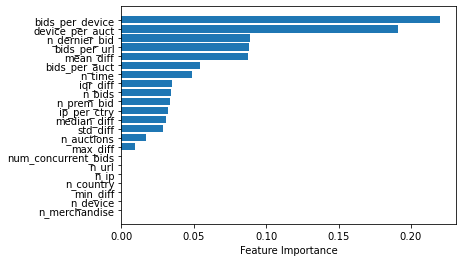

In [56]:
X = data.loc[:,(data.columns != 'outcome')&(data.columns != "bidder_id")]
y = data.loc[:,data.columns == 'outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train,y_train)

sort = rf.feature_importances_.argsort()
plt.barh([X.columns[elt] for elt in sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

Essayons d'autre méthodes de détermination d'importance de features

In [57]:
data.groupby('outcome').mean().T

outcome,0,1
n_bids,1121.938272,1520.500000
n_auctions,58.395062,119.333333
n_merchandise,1.000000,1.000000
n_device,81.864198,87.000000
n_time,1095.185185,1445.000000
n_country,14.753086,18.333333
n_ip,601.382716,801.166667
n_url,256.185185,219.166667
bids_per_auct,5.948732,15.502561
bids_per_device,4.665599,72.107571


 On remarque que la colonne n_merchandise a la meme moyenne pour les robots et les humains. Elle sera moins utile pour déterminer si le bidder est un humain ou un robot. Ceci est aussi confirmer par le score de feature importance par Random Forest. Nous décidons donc d'enlever ce feature

In [58]:
data.drop(['n_merchandise'],axis = 1, inplace=True)

Une autre méthode pour déterminer les features importants est de voir la distribution de ces derniers pour les deux classes. Un bon feature aura deux distributions différentes pour les deux classes.

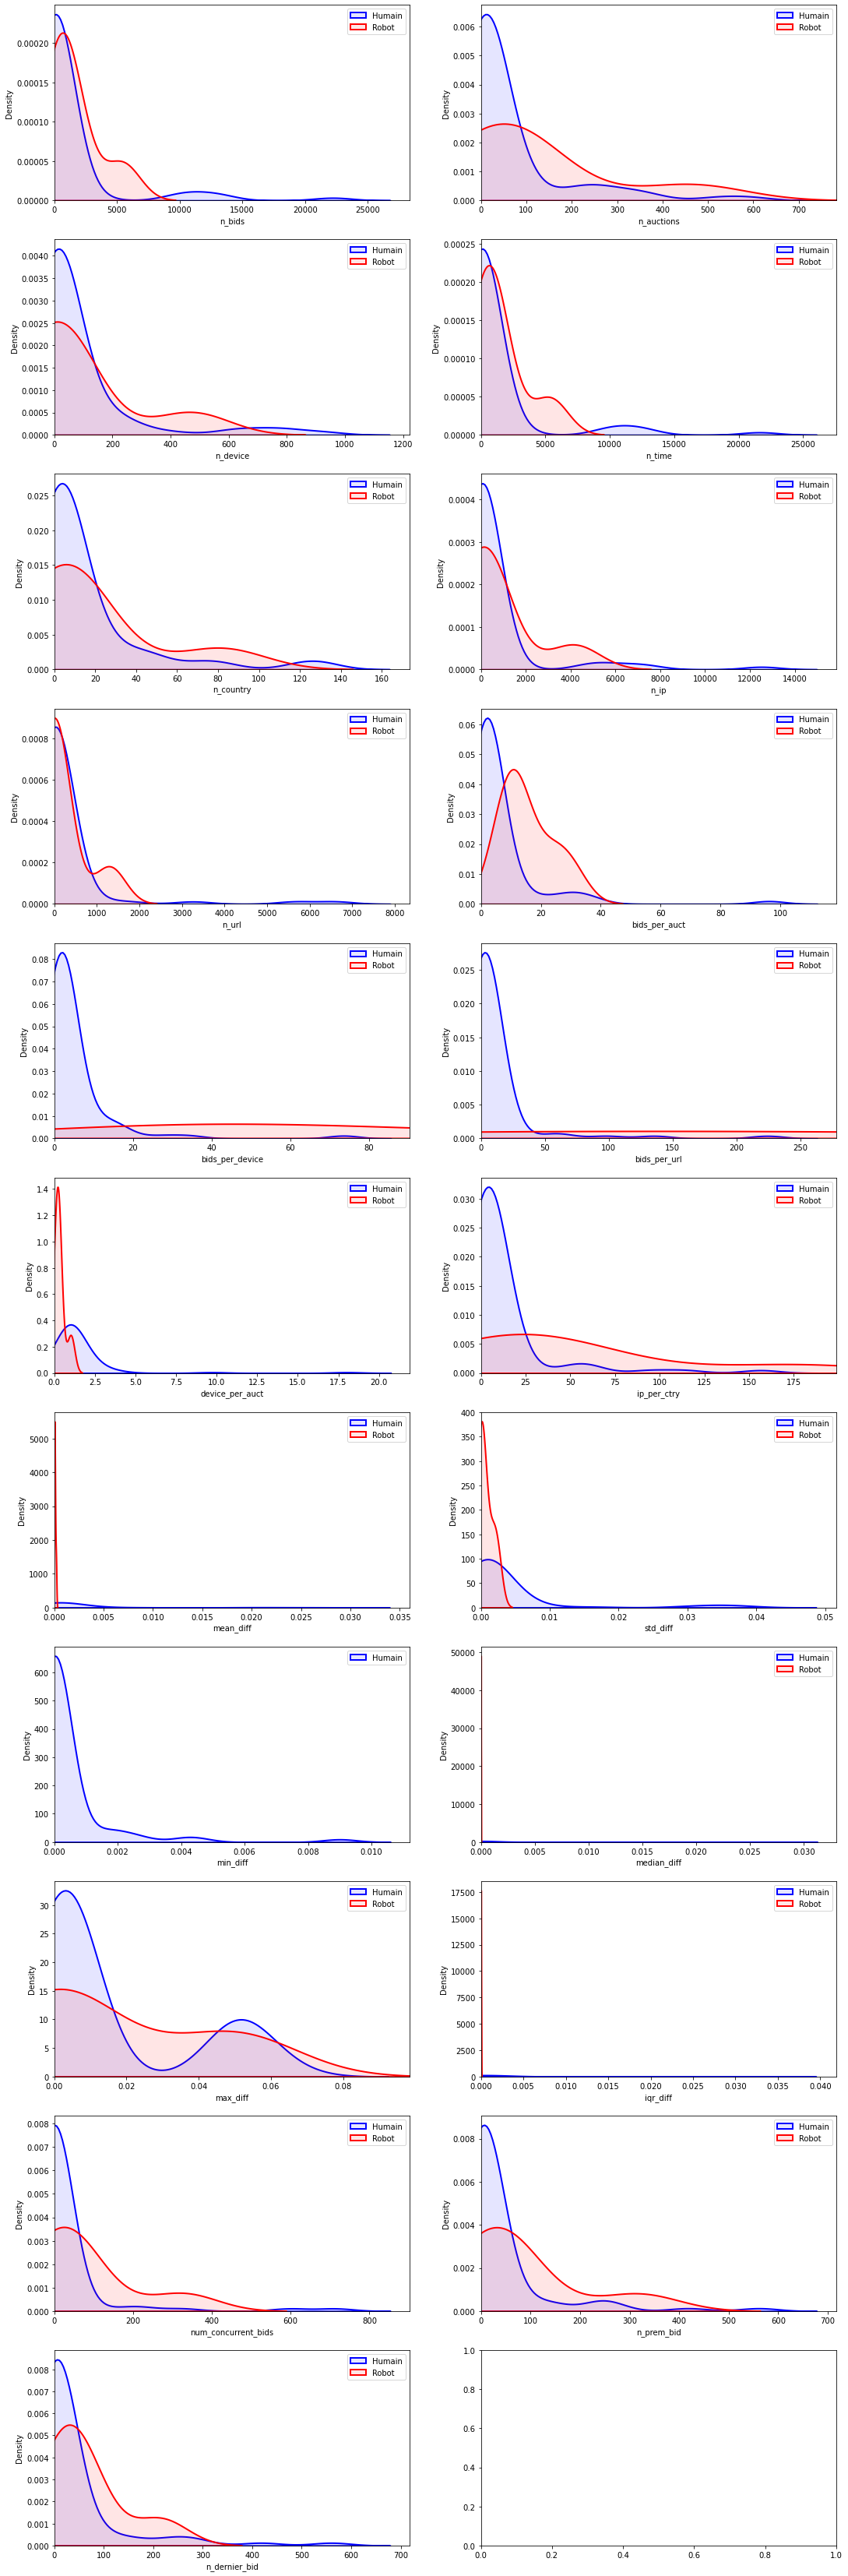

In [59]:
features = data.loc[:,(data.columns != 'bidder_id') & (data.columns != "outcome")]
nrows = 11
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (18, 60))
for i, column in enumerate(features.columns):
    humains = sns.kdeplot(data = data[data['outcome'] == 0],
                x = column,
                ax = axes[i // ncols, i % ncols],
                color = 'blue',
                fill = True,
                alpha = 0.1,
                linewidth = 2,
                label = 'Humain').set_xlim(left = 0)
    robots = sns.kdeplot(data = data[data['outcome'] == 1],
                x = column,
                ax = axes[i // ncols, i % ncols],
                color = 'red',
                fill = True,
                alpha = 0.1,
                linewidth = 2,
                label = 'Robot').set_xlim(left = 0)
    axes[i // ncols,i % ncols].legend()
    
plt.show()

le feature n_url a deux distribution assez similiaire. Nous choisissons de l'eliminer

In [60]:
data = data.drop(['n_url'], axis =1)

# Learning and Model validation

Nous remarquons tout d'abord que notre jeu de données est trés dèsequilibré. Le nombre d'humain est très supérieur à celui des robots. 

In [61]:
data['outcome'].value_counts()

0    81
1     6
Name: outcome, dtype: int64

<AxesSubplot:xlabel='outcome'>

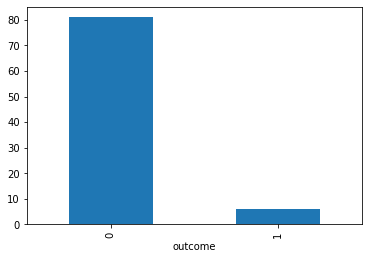

In [62]:
data.pivot_table(index='outcome', aggfunc='size').plot(kind='bar')

Pour remediér à cela, deux méthodes majeurs existent. Le sous-échantillonnage (Undersampling) est le processus par lequel vous supprimez de manière aléatoire certaines des observations de la classe majoritaire afin de faire correspondre les chiffres avec ceux de la classe minoritaire. Cette méthode ne nous convient pas puisque nous avions deja un manque des observations. Nous nous pouvons pas nous permettre d'enlever des observations.

En outre,Il existe le sur-échantillonnage (Oversampling). Il s'agit du processus de génération de données synthétiques qui tente de générer de manière aléatoire un échantillon des attributs à partir des observations de la classe minoritaire. Il existe un certain nombre de méthodes utilisées pour suréchantillonner un ensemble de données pour un problème de classification typique. La technique la plus courante est appelée SMOTE (Synthetic Minority Over-sampling Technique). En termes simples, elle examine l'espace des caractéristiques des points de données de la classe minoritaire et considère ses k voisins les plus proches.


Nous devons toujours diviser notre ensemble de données en train et test avant d'équilibrer les données. De cette façon, nous nous assurons que l'ensemble de données de test est aussi impartial que possible et qu'il reflète une véritable évaluation de notre modèle.
Équilibrer les données avant de les diviser peut introduire un biais dans l'ensemble de test, où quelques points de données sont générés synthétiquement et sont bien connus de l'ensemble d'entraînement. L'ensemble de test doit être aussi objectif que possible.

Dans les cas où les données sont équilibrées, nous pouvons générer un ensemble train/test simplement en assignant de manière aléatoire 30% des données à un ensemble de test. Cependant, dans le cas de données déséquilibrées, cette méthode doit être évitée. Le risque est grand de se retrouver avec presque aucun cas de la classe minoritaire dans l'ensemble de test.

L'échantillonnage stratifié est une solution à ce problème. L'échantillonnage stratifié force l'équilibre des classes sur l'ensemble de données de formation et de test comme les données d'origine.

In [63]:
dtrain, dtest = train_test_split(data, test_size = 0.3, stratify=data.outcome)

<AxesSubplot:title={'center':"Verifier que la distribution dans train est la meme que les données d'entrée"}, xlabel='outcome'>

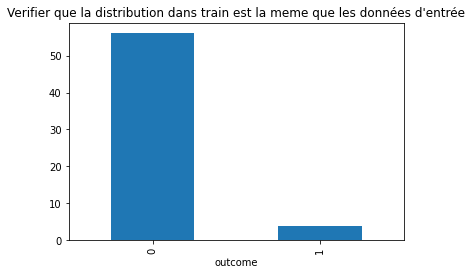

In [64]:
dtrain.pivot_table(index='outcome', aggfunc='size').plot(kind='bar', title="Verifier que la distribution dans train est la meme que les données d'entrée")


<AxesSubplot:title={'center':"Verifier que la distribution dans test est la meme que les données d'entrée"}, xlabel='outcome'>

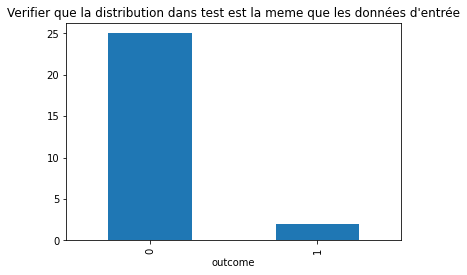

In [65]:
dtest.pivot_table(index='outcome', aggfunc='size').plot(kind='bar', title="Verifier que la distribution dans test est la meme que les données d'entrée")


On appliquera maintenant la méthode SMOTE. Pour y faire, on utilisera le package imblearn

In [66]:
X_smote, y_smote = SMOTE(k_neighbors=3).fit_resample(dtrain[['n_bids', 'n_auctions', 'n_device', 'n_time',
       'n_country', 'n_ip', 'bids_per_auct', 'bids_per_device',
       'bids_per_url', 'device_per_auct', 'ip_per_ctry', 'mean_diff',
       'std_diff', 'min_diff', 'median_diff', 'max_diff', 'iqr_diff',
       'num_concurrent_bids', 'n_prem_bid', 'n_dernier_bid']], dtrain['outcome'])

<AxesSubplot:title={'center':'Distribution des classes après SMOTE'}, xlabel='outcome'>

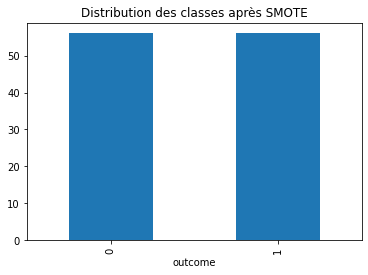

In [67]:
pd.Series(y_smote).value_counts().plot(kind='bar', title='Distribution des classes après SMOTE', xlabel='outcome')


Une autre méthode consiste à utiliser un autoencoder variationel (VAE) pour génerer de nouvelles échantillons pour la classe dont on a peu d'échantillons. De cette manière, on pourrait avoir un dataset plus équilibré. 

On commence tout d'abord par définir notre classe VAE. On utilisera dans ce notebook le framework Tensorflow

In [68]:

relu = tf.nn.relu


class VAE(tf.keras.Model):
    """
    Nous heritons une classe VAE de tf.keras.Model

    paramètres:
    ndim (int): nombre de dimensions des données d'entrée
    latent_dim (int): nombre de dimensions de la variable latente

    attributs:
    ndim (int): nombre de dimensions de l'entrée
    latent_dim (int): nombre de dimensions de la variable latente
    inference_net (keras.Sequential): Le modèle d'inférence qui prend une entrée de taille=(None, ndim) et retourne une matrice de taille=(None, latent_dim)
    generative_net (keras.Sequential): Le modèle génératif qui prend une entrée de taille=(None, latent_dim) et retourne une matrice de taille=(None, ndim)
    """
    def __init__(self, ndim, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim  
        self.ndim = ndim        
        self.inference_net = Sequential(
            [
                InputLayer(input_shape=(ndim,)),
                Dense(100, activation=relu),
                Dense(2 * latent_dim)
            ]
        )
        
        self.generative_net = Sequential(
            [
                InputLayer(input_shape=(latent_dim,)),
                Dense(100, activation=relu),
                Dense(ndim)
            ])

    @tf.function
    def sample(self, num_samples=100, eps=None):
        """
        Étant donné un bruit d'entrée de taille (num_échantillons, latent_dim), générer des échantillons de taille (num_échantillons, ndim)

        paramètres :
        num_samples (int) : nombre d'échantillons
        eps (numpy.ndarray) : bruit d'entrée. Si spécifié, num_samples est ignoré.

        retourne :
        numpy.ndarray : les échantillons décodés
        """
        if eps is None:
            eps = tf.random.normal(shape=(num_samples, self.latent_dim))
        return self.decode(eps)

    def encode(self, x):
        """
        
       paramètres :
        x (numpy.ndarray) : les données d'entrée de taille (None, ndim)

        renvoie :
        numpy.ndarray : la moyenne des variables latentes
        numpy.ndarray : la variance logarithmique des variables latentes
        """
        mean, logvar = tf.split(self.inference_net(x), num_or_size_splits=2, axis=1)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        """
         Reparamétrer l'entrée pour la rétropropagation

        paramètres :
        mean (numpy.ndarray) : la moyenne des variables latentes
        logvar (numpy.ndarray) : la variance logarithmique des variables latentes

        retours :
        numpy.ndarray : les échantillons de bruit à partir d'une distribution normale autour de la moyenne avec un écart type exp(logvar / 2)
        """
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * 0.5) + mean

    def decode(self, z):
        """
        Étant donné un bruit d'entrée, il génère les échantillons décodés

        paramètres :
        z (numpy.ndarray) : le bruit d'entrée (None, latent_dim)

        renvoie :
        numpy.ndarray : les échantillons décodés de taille (None, ndim)
        """
        return self.generative_net(z)

In [69]:
# une fonction pour calculer le terme KL de la distribution gaussienne
def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(-0.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
                         axis=raxis)

# une fonction permettant de calculer la perte du VAE
@tf.function
def compute_loss(model, x):
    mean, logvar = model.encode(x)
    logvar = tf.clip_by_value(logvar, -88., 88.)
    z = model.reparameterize(mean, logvar)
    xmean = model.decode(z)
    logpx_z = -tf.reduce_sum((x - xmean) ** 2, axis=1)  
    logpz = log_normal_pdf(z, 0.0, 0.0)
    logqz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)

# Une fonction qui, étant donné le modèle, calcule la perte, les gradients et applique la mise à jour des paramètres.
@tf.function
def compute_apply_gradients(model, x, optimizer):
    with tf.GradientTape() as tape:
        loss = compute_loss(model, x)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Voici la fonction train qui permettra de mettre à jour les poids

In [70]:
def train(xtrain, xtest, model=None, load=False, filepath=None):
    optimizer = tf.keras.optimizers.Adam(1e-3)
    epochs = 2000
    latent_dim = 15
    num_train, ndim = xtrain.shape
    num_test, _ = xtest.shape
    if model is None:
        model = VAE(ndim, latent_dim)
    if load and filepath is not None:
        model.load_weights(filepath=filepath)
        return model
    else:
        batch_size = 32
        train_dataset = tf.data.Dataset.from_tensor_slices(xtrain.values.astype(np.float32)).shuffle(num_train).batch(
            batch_size)

        test_dataset = tf.data.Dataset.from_tensor_slices(xtest.values.astype(np.float32)).shuffle(num_test).batch(num_test)

        for epoch in range(1, epochs + 1):
            start_time = time.time()
            for train_x in train_dataset:
                compute_apply_gradients(model, train_x, optimizer)
            end_time = time.time()

            if epoch % 100 == 0:
                loss = tf.keras.metrics.Mean()
                for test_x in test_dataset:
                    loss(compute_loss(model, test_x))
                elbo = -loss.result()
                print('Epoch: {}, Test set psudo-ELBO: {}, '
                      'time elapsed for current epoch {}'.format(epoch, elbo, end_time - start_time))
                model.save_weights('saved_models/model_%d_at_%d' % (latent_dim, epoch))
    return model

Une fois le VAE entraîné, nous pouvons le passer à cette fonction et en tirer des échantillons pour augmenter le nombre de robots.

In [71]:
def augment_data(data, model):
    num_samples = data['outcome'].value_counts()[0] - data['outcome'].value_counts()[1]
    samples = model.sample(num_samples=num_samples).numpy()
    dfnew = pd.DataFrame(samples, columns=data.columns.drop(['outcome']))
    dfnew['outcome'] = np.ones(len(samples), dtype=np.int)
    dfnew = pd.concat((data, dfnew), ignore_index=True).sample(frac=1)
    return dfnew

Cette fonction permet de récuperer les échantillons des bidders qui sont des robots

In [72]:
def robot_or_not(dftrain, dftest):
    """
    paramètres :
    dftrain (pandas.DataFrame) : Le cadre de données de formation
    dftest (pandas.DataFrame) : Le cadre de données de test

    Retourne :
    pandas.DataFrame : La partie frauduleuse du cadre de données de formation
    pandas.DataFrame : La partie frauduleuse du cadre de données de test
    """
    robot = dftrain.loc[dftrain['outcome'] == 1].sample(frac=1)
    robottest = dftest.loc[dftest['outcome'] == 1].sample(frac=1)
    return robot.drop(['outcome'], axis=1), robottest.drop(['outcome'], axis=1)

Le VAE a besoin que les inputs soient normalisés . Pour cela nous allons StandardScaler de Scikit-learn.


In [73]:
# Cette fonction permet de standariser les données train et test en utilisant StandardScaler de Scikit-learn
def standarize_data(dtrain,dtest):
    temp = dtrain.drop(["bidder_id"],axis=1)
    tempt= dtest.drop(["bidder_id"],axis=1)
    temp.reset_index(drop=True,inplace=True)
    tempt.reset_index(drop=True,inplace = True)
    X = dtrain.drop(["outcome","bidder_id"],axis = 1)
    Xt = dtest.drop(["outcome","bidder_id"],axis = 1)
    columns = X.columns
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X)
    X.columns = columns
    X['outcome'] = temp['outcome']
    scaler = StandardScaler()
    Xt = scaler.fit_transform(Xt)
    Xt = pd.DataFrame(Xt)
    Xt.columns = columns
    Xt['outcome'] = tempt['outcome']
    dtrain_std = X
    dtest_std = Xt
    return dtrain_std,dtest_std
    
    

In [74]:
# Standariser les données
dtrain_std , dtest_std = standarize_data(dtrain,dtest)
# Recuperer les robots du train et test
X, Xt = robot_or_not(dtrain_std, dtest_std)
# Entrainer le modele VAE
model = train(X, Xt, load=False, filepath='saved_models/model_20_at_1900')
# Augmenter les données en prenant des échantillons
train_vae = augment_data(dtrain_std, model)


Epoch: 100, Test set psudo-ELBO: -57.20515441894531, time elapsed for current epoch 0.006035566329956055
Epoch: 200, Test set psudo-ELBO: -57.86427307128906, time elapsed for current epoch 0.00497746467590332
Epoch: 300, Test set psudo-ELBO: -61.20193862915039, time elapsed for current epoch 0.003987550735473633
Epoch: 400, Test set psudo-ELBO: -66.86865234375, time elapsed for current epoch 0.006730556488037109
Epoch: 500, Test set psudo-ELBO: -64.244384765625, time elapsed for current epoch 0.00398564338684082
Epoch: 600, Test set psudo-ELBO: -62.033058166503906, time elapsed for current epoch 0.005892515182495117
Epoch: 700, Test set psudo-ELBO: -58.275753021240234, time elapsed for current epoch 0.003986835479736328
Epoch: 800, Test set psudo-ELBO: -61.68855667114258, time elapsed for current epoch 0.005609273910522461
Epoch: 900, Test set psudo-ELBO: -64.57379150390625, time elapsed for current epoch 0.0038509368896484375
Epoch: 1000, Test set psudo-ELBO: -70.22013854980469, time 

On se retrouve donc avec un jeu de données équilibré. 

<AxesSubplot:xlabel='outcome'>

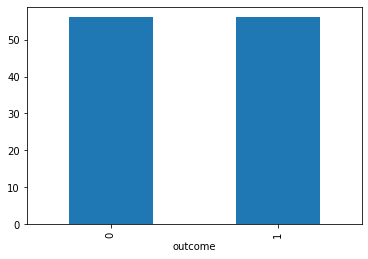

In [75]:
train_vae.pivot_table(index='outcome', aggfunc='size').plot(kind='bar')

Une autre facon de génerer de nouvelle données est d'utiliser l'interpolation de l'espace latent

In [76]:
def augment_data_interpolation(data, model):
    num_samples = data['outcome'].value_counts()[0] - data['outcome'].value_counts()[1]
    X = data[data['outcome'] == 1].drop(['outcome'], axis=1)
    z, _ = model.encode(X.values.astype(np.float32))
    z1 = pd.DataFrame(z).sample(frac=num_samples / len(z), replace=True)
    z2 = z1.sample(frac=1)
    r = np.random.rand(*z1.shape)
    z = r * z1.values + (1 - r) * z2.values
    samples = model.decode(z.astype(np.float32)).numpy()
    dfnew = pd.DataFrame(samples, columns=data.columns.drop('outcome'))
    dfnew['outcome'] = np.ones(len(samples), dtype=np.int)
    dfnew = pd.concat((data, dfnew), ignore_index=True).sample(frac=1)
    return dfnew

On génere de nouvelle données avec de l'interpolation.

In [77]:
train_vae_interpolate = augment_data_interpolation(dtrain_std, model)

On se retrouve encore une fois avec un jeu de données équilibré.

<AxesSubplot:xlabel='outcome'>

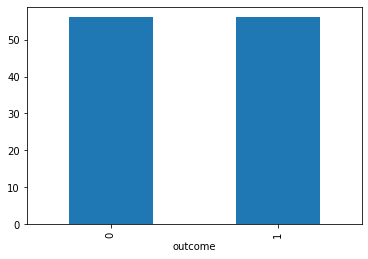

In [78]:
train_vae_interpolate.pivot_table(index='outcome', aggfunc='size').plot(kind='bar')

Un autre moyen pour réaliser le sur-échantillonge est d'augmenter la taille de l'ensemble des données d'apprentissage par la répétition aléatoire des exemples originaux en utilisant le RandomOversampler et d'utiliser des méthodes d'ensembles

## Entrainement des modèles 

Nous allons nous experimenter sur les 6 versions du jeux de données suivants :
* Dataset sans aucune modification (dtrain, dtest)
* Dataset standarisé (dtrain_std, dtest_std)
* Dataset équilibré avec SMOTE (X_smote, y_smote, dtest)
* Dataset standarisé et équilibré avec SMOTE (X_smote_std, y_smote_std, dtest)
* Dataset équilibré avec échantillonge par VAE (train_vae, dtest)
* Dataset équilibré par interpolation en utilisat VAE (train_vae_interpolate, dtest)

Standarisons les données SMOTE 

In [79]:
scaler = StandardScaler()
X_smote_std = scaler.fit_transform(X_smote)
X_smote_std = pd.DataFrame(X_smote_std)
X_smote_std.columns = X_smote.columns

Récuperons les inputs et les targets depuis les différents datasets

In [80]:
X = dtrain.drop("bidder_id",axis=1).iloc[:,1:]
y = dtrain.outcome
X_test = dtest.drop("bidder_id",axis=1).iloc[:,1:]
y_test = dtest.outcome

X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)


X_std = dtrain_std.iloc[:,:-1]
y_std = dtrain_std.outcome
X_test_std = dtest_std.iloc[:,:-1]
y_test_std = dtest_std.outcome


X_std = np.array(X_std)
y_std = np.array(y_std)
X_test_std = np.array(X_test_std)
y_test_std = np.array(y_test_std)

X_vae = train_vae.drop(['outcome'], axis=1)
y_vae = train_vae.outcome

X_vae = np.array(X_vae)
y_vae = np.array(y_vae)

X_vae_interpolate = train_vae_interpolate.drop(['outcome'],axis=1)
y_vae_interpolate = train_vae_interpolate.outcome

X_vae_interpolate = np.array(X_vae_interpolate)
y_vae_interpolate = np.array(y_vae_interpolate)

X_smote = np.array(X_smote)
y_smote = np.array(y_smote)


X_smote_std = np.array(X_smote_std)


### Regression logistique

Commencons par l'un des modèles le moins complexe en terme de dimension de Vapnik–Chervonenkis. Il s'agit de la regression logistique. 
On commencera par les paramètres par défaut et on les optimisera par la suite. 

Nous entrainons dans un premier temps le modèle sur les données non équilibré.

In [81]:
lr = LogisticRegression()
lr.fit(X,y)
y_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.9629629629629629
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.50      0.67         2

    accuracy                           0.96        27
   macro avg       0.98      0.75      0.82        27
weighted avg       0.96      0.96      0.96        27



In [82]:
print("la prédiction de la regression logistique",lr.predict(X_test))
print('les valeurs réelles des données test',y_test)

la prédiction de la regression logistique [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
les valeurs réelles des données test [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


Nous remarquons que le logistic regression est capable de détecter correctement les humains mais il n'a pas pu détecter les robots.

Essayons maintenant d'optimiser les hyperparamètres par gridsearchcv

In [83]:
parameters = {'penalty': ("none",'l1',"l1","elasticnet"), "C": np.arange(0,10,0.2)}
lr_grid = LogisticRegression()
grid = GridSearchCV(lr_grid,parameters,cv =5)
grid.fit(X,y)
grid.best_params_

{'C': 0.0, 'penalty': 'none'}

In [84]:
lr_grid = LogisticRegression(penalty='none', C=0.2)
lr_grid.fit(X,y)
y_pred = lr.predict(X_test)
print("Accuracy is equal to {}".format(lr.score(X_test,y_test)))
print(classification_report(y_test,y_pred))

Accuracy is equal to 0.9629629629629629
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.50      0.67         2

    accuracy                           0.96        27
   macro avg       0.98      0.75      0.82        27
weighted avg       0.96      0.96      0.96        27



Nous remarquons pas de différence. Toutefois, nous n'allons plus optimiser les hyperparametre en utilisant GridsearchCV puisque c'est une méthode exhaustive qui prends beaucoup de temps pour évaluer touts les hyperparametres possible.


Nous allons utiliser Optuna qui est un cadre d'optimisation d'hyperparamètres open source pour automatiser la recherche d'hyperparamètres. Il utilise des algorithmes d'optimisation de pointe afin de rechercher efficacement de grands espaces et d'élaguer les essais non prometteurs pour des résultats plus rapides.

In [92]:
import pickle

In [86]:
# cette fonction permet de definir la fonction objective à optimiser par le framework optuna
# Elle contient les paramètres à optimiser et le modèle de logistic regression
def lr_objective(trial,X,y,X_test,y_test):
    penalty_lr = trial.suggest_categorical("penalty_lr",["l2","none"])
    C_lr = trial.suggest_float("C_lr",0.1,10)
    lr = LogisticRegression(penalty=penalty_lr,C=C_lr)
    lr.fit(X,y)
    return lr.score(X_test,y_test)



In [87]:
# Cette fonction permet de définir la fonction objective après de l'avoir optimisé pour nous permettre de calculer les différents métriques après optimisation
def post_lr_objective(trial,X,y,X_test,y_test):
    penalty_lr = trial.suggest_categorical("penalty_lr",["l2","none"])
    C_lr = trial.suggest_float("C_lr",0.1,10)
    lr = LogisticRegression(penalty=penalty_lr,C=C_lr)
    lr.fit(X,y)
    pred = lr.predict(X_test)
    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test)
    precision = precision_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    
    
    return acc,f1, recall ,precision




In [101]:
def logisticregression(X, y, X_test, y_test):
    func = lambda trial: lr_objective(trial, X, y, X_test, y_test)
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(direction='maximize')

    with tqdm(total=100) as pbar:
        def callback(study, trial):
            pbar.update(1)

        study.optimize(func, n_trials=100, callbacks=[callback])

    # Récupérer les meilleurs paramètres et ajuster les noms des clés
    best_params = study.best_trial.params
    best_params['penalty'] = best_params.pop('penalty_lr')
    best_params['C'] = best_params.pop('C_lr')

    # Création et entraînement du modèle avec les meilleurs paramètres
    optimized_lr = LogisticRegression(**best_params)
    optimized_lr.fit(X, y)

    # Enregistrement du modèle optimisé
    with open('model.pkl', 'wb') as file:
        pickle.dump(optimized_lr, file)

    # Appel à post_lr_objective pour calculer les métriques
    acc, f1, recall, precision = post_lr_objective(study.best_trial, X, y, X_test, y_test)

    return acc, f1, recall, precision

In [89]:
# On recupere les metriques pour dataset desequilibre
acc_lr,f1_lr,recall_lr,precision_lr = logisticregression(X,y,X_test,y_test)

100%|██████████| 100/100 [00:02<00:00, 39.51it/s]


In [91]:
f1_lr

0.6666666666666666

In [102]:
# On recupere les metriques pour dataset desequilibre standarise
acc_lr_std,f1_lr_std,recall_lr_std,precision_lr_std = logisticregression(X_std,y_std,X_test_std,y_test_std)

100%|██████████| 100/100 [00:00<00:00, 133.21it/s]


In [103]:
acc_lr_std,f1_lr_std,recall_lr_std,precision_lr_std

(0.9629629629629629, 0.6666666666666666, 1.0, 0.5)

In [104]:
# On recupere les metriques pour dataset equilibre avec smote
acc_lr_smote,f1_lr_smote,recall_lr_smote,precision_lr_smote = logisticregression(X_smote,y_smote,X_test,y_test)

100%|██████████| 100/100 [00:02<00:00, 42.39it/s]


In [105]:
# On recupere les metriques pour dataset equilibre avec smote standarise
acc_lr_smote_std,f1_lr_smote_std,recall_lr_smote_std,precision_lr_smote_std = logisticregression(X_smote_std,y_smote,X_test_std,y_test_std)

100%|██████████| 100/100 [00:00<00:00, 125.99it/s]


In [106]:
# On recupere les metriques pour dataset equilibre avec echantillonge vae
acc_lr_vae,f1_lr_vae,recall_lr_vae,precision_lr_vae = logisticregression(X_vae,y_vae,X_test_std,y_test_std)

100%|██████████| 100/100 [00:00<00:00, 112.85it/s]


In [107]:
# On recupere les metriques pour dataset equilibre avec interpolation vae
acc_lr_vae_interpolate,f1_lr_vae_interpolate,recall_lr_vae_interpolate,precision_lr_vae_interpolate = logisticregression(X_vae_interpolate,y_vae_interpolate,X_test_std,y_test_std)

100%|██████████| 100/100 [00:00<00:00, 131.00it/s]


In [108]:
results = {}
results['accuracy'] = pd.DataFrame(columns = ['Data',"Data_std","Data_smote","Data_smote_std","Data_vae","Data_vae_interpolate"])
results['f1_score'] = pd.DataFrame(columns = ['Data',"Data_std","Data_smote","Data_smote_std","Data_vae","Data_vae_interpolate"])
results['recall'] = pd.DataFrame(columns = ['Data',"Data_std","Data_smote","Data_smote_std","Data_vae","Data_vae_interpolate"])
results['precision'] = pd.DataFrame(columns = ['Data',"Data_std","Data_smote","Data_smote_std","Data_vae","Data_vae_interpolate"])


In [109]:
results['accuracy'].loc['Logistic Regression'] = [acc_lr,acc_lr_std,acc_lr_smote,acc_lr_smote_std,acc_lr_vae,acc_lr_vae_interpolate]
results['f1_score'].loc['Logistic Regression'] = [f1_lr,f1_lr_std,f1_lr_smote,f1_lr_smote_std,f1_lr_vae,f1_lr_vae_interpolate]
results['recall'].loc['Logistic Regression'] = [recall_lr,recall_lr_std,recall_lr_smote,recall_lr_smote_std,recall_lr_vae,recall_lr_vae_interpolate]
results['precision'].loc['Logistic Regression'] = [precision_lr,precision_lr_std,precision_lr_smote,precision_lr_smote_std,precision_lr_vae,precision_lr_vae_interpolate]


In [110]:
results['accuracy']

,Data,Data_std,Data_smote,Data_smote_std,Data_vae,Data_vae_interpolate
Logistic Regression,0.962963,0.962963,0.962963,0.407407,0.962963,0.962963


### SVM

Passerons maintenant au modèle SVM. Nous entrainerons ce modèle avec optimisation des hyperparametres sur les différents version du jeux de données.

In [111]:
# cette fonction permet de definir la fonction objective à optimiser par le framework optuna
# Elle contient les paramètres à optimiser et le modèle de svm
def svm_objective(trial,X,y,X_test,y_test):
    kernel_svm = trial.suggest_categorical("kernel_svm",["linear","poly","rbf","sigmoid"])
    C_svm = trial.suggest_float("C_svm",0.1,10)
    svm = SVC(kernel=kernel_svm,C=C_svm)
    svm.fit(X,y)
    return svm.score(X_test,y_test)



In [112]:
# Cette fonction permet de définir la fonction objective après de l'avoir optimisé pour nous permettre de calculer les différents métriques après optimisation
def post_svm_objective(trial,X,y,X_test,y_test):
    kernel_svm = trial.suggest_categorical("kernel_svm",["linear","poly","rbf","sigmoid"])
    C_svm = trial.suggest_float("C_svm",0.1,10)
    svm = SVC(kernel=kernel_svm,C=C_svm)
    svm.fit(X,y)
    pred = svm.predict(X_test)
    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test)
    precision = precision_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    
    
    return acc,f1, recall ,precision



In [113]:
# Cette fonction nous permets d'entrainer le modèle pour des différents inputs
def svm_model(X,y,X_test,y_test):
    func = lambda trial: svm_objective(trial, X,y,X_test,y_test)
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(direction = 'maximize')
    study.optimize(func,n_trials=100)
    func_post = lambda trial: post_svm_objective(trial, X,y,X_test,y_test)
    acc, f1,recall, precision = func_post(study.best_trial)
    return acc,f1,recall,precision
    

In [114]:
# On recupere les metriques pour dataset desequilibre
acc_svm,f1_svm,recall_svm,precision_svm = svm_model(X,y,X_test,y_test)

In [115]:



# On recupere les metriques pour dataset desequilibre standarise
acc_svm_std,f1_svm_std,recall_svm_std,precision_svm_std = svm_model(X_std,y_std,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec smote
acc_svm_smote,f1_svm_smote,recall_svm_smote,precision_svm_smote = svm_model(X_smote,y_smote,X_test,y_test)



# On recupere les metriques pour dataset equilibre avec smote standarise
acc_svm_smote_std,f1_svm_smote_std,recall_svm_smote_std,precision_svm_smote_std = svm_model(X_smote_std,y_smote,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec echantillonge vae
acc_svm_vae,f1_svm_vae,recall_svm_vae,precision_svm_vae = svm_model(X_vae,y_vae,X_test_std,y_test_std)



# On recupere les metriques pour dataset equilibre avec interpolation vae
acc_svm_vae_interpolate,f1_svm_vae_interpolate,recall_svm_vae_interpolate,precision_svm_vae_interpolate = svm_model(X_vae_interpolate,y_vae_interpolate,X_test_std,y_test_std)


In [116]:
results['accuracy'].loc['SVM'] = [acc_svm,acc_svm_std,acc_svm_smote,acc_svm_smote_std,acc_svm_vae,acc_svm_vae_interpolate]
results['f1_score'].loc['SVM'] = [f1_svm,f1_svm_std,f1_svm_smote,f1_svm_smote_std,f1_svm_vae,f1_svm_vae_interpolate]
results['recall'].loc['SVM'] = [recall_svm,recall_svm_std,recall_svm_smote,recall_svm_smote_std,recall_svm_vae,recall_svm_vae_interpolate]
results['precision'].loc['SVM'] = [precision_svm,precision_svm_std,precision_svm_smote,precision_svm_smote_std,precision_svm_vae,precision_svm_vae_interpolate]


In [117]:
results['accuracy']

,Data,Data_std,Data_smote,Data_smote_std,Data_vae,Data_vae_interpolate
Logistic Regression,0.962963,0.962963,0.962963,0.407407,0.962963,0.962963
SVM,0.962963,0.962963,0.962963,0.814815,0.962963,0.962963


### RandomForest

Passerons maintenant au modèle RandomForest. Nous entrainerons ce modèle avec optimisation des hyperparametres sur les différents versions du jeux de données.

In [118]:
# cette fonction permet de definir la fonction objective à optimiser par le framework optuna
# Elle contient les paramètres à optimiser et le modèle de RandomForest
def rf_objective(trial,X,y,X_test,y_test):
    n_estimators_rf = trial.suggest_int("n_estimator",20,1000)
    criterion_rf = trial.suggest_categorical("criterion",["gini","entropy","log_loss"])
    max_features_rf = trial.suggest_categorical("max_features",["sqrt","log2",None])
    rf = RandomForestClassifier(n_estimators=n_estimators_rf,criterion=criterion_rf, max_features = max_features_rf )
    rf.fit(X,y)
    return rf.score(X_test,y_test)



In [119]:
# Cette fonction permet de définir la fonction objective après de l'avoir optimisé pour nous permettre de calculer les différents métriques après optimisation
def post_rf_objective(trial,X,y,X_test,y_test):
    n_estimators_rf = trial.suggest_int("n_estimator",20,1000)
    criterion_rf = trial.suggest_categorical("criterion",["gini","entropy","log_loss"])
    max_features_rf = trial.suggest_categorical("max_features",["sqrt","log2",None])
    rf = RandomForestClassifier(n_estimators=n_estimators_rf,criterion=criterion_rf, max_features = max_features_rf )
    rf.fit(X,y)
    pred = rf.predict(X_test)
    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test)
    precision = precision_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    
    
    return acc,f1, recall ,precision



In [121]:
# Cette fonction nous permets d'entrainer le modèle pour des différents inputs
def rf_model(X,y,X_test,y_test):
    func = lambda trial: rf_objective(trial, X,y,X_test,y_test)
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(direction = 'maximize')
    
    study.optimize(func,n_trials=100,show_progress_bar=True)
    func_post = lambda trial: post_rf_objective(trial, X,y,X_test,y_test)
    acc, f1,recall, precision = func_post(study.best_trial)
    return acc,f1,recall,precision
    

In [124]:
# On recupere les metriques pour dataset desequilibre
acc_rf,f1_rf,recall_rf,precision_rf = rf_model(X,y,X_test,y_test)

  4%|▍         | 4/100 [00:02<00:55,  1.74it/s][W 2023-12-17 21:49:48,509] Trial 4 failed with parameters: {'n_estimator': 759, 'criterion': 'log_loss', 'max_features': None} because of the following error: KeyError('log_loss').
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_18016\1374402258.py", line 3, in <lambda>
    func = lambda trial: rf_objective(trial, X,y,X_test,y_test)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_18016\2139197543.py", line 8, in rf_objective
    rf.fit(X,y)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\HP\anaconda3\lib\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "c:\Users\HP\anaconda3\lib\site-packages\joblib\parallel.py

KeyError: 'log_loss'

In [123]:


# On recupere les metriques pour dataset desequilibre standarise
acc_rf_std,f1_rf_std,recall_rf_std,precision_rf_std = rf_model(X_std,y_std,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec smote
acc_rf_smote,f1_rf_smote,recall_rf_smote,precision_rf_smote = rf_model(X_smote,y_smote,X_test,y_test)



# On recupere les metriques pour dataset equilibre avec smote standarise
acc_rf_smote_std,f1_rf_smote_std,recall_rf_smote_std,precision_rf_smote_std = rf_model(X_smote_std,y_smote,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec echantillonge vae
acc_rf_vae,f1_rf_vae,recall_rf_vae,precision_rf_vae = rf_model(X_vae,y_vae,X_test_std,y_test_std)



# On recupere les metriques pour dataset equilibre avec interpolation vae
acc_rf_vae_interpolate,f1_rf_vae_interpolate,recall_rf_vae_interpolate,precision_rf_vae_interpolate = rf_model(X_vae_interpolate,y_vae_interpolate,X_test_std,y_test_std)


  0%|          | 0/100 [00:00<?, ?it/s][W 2023-12-17 21:49:33,652] Trial 0 failed with parameters: {'n_estimator': 904, 'criterion': 'log_loss', 'max_features': None} because of the following error: KeyError('log_loss').
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_18016\1374402258.py", line 3, in <lambda>
    func = lambda trial: rf_objective(trial, X,y,X_test,y_test)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_18016\2139197543.py", line 8, in rf_objective
    rf.fit(X,y)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\HP\anaconda3\lib\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "c:\Users\HP\anaconda3\lib\site-packages\joblib\parallel.py", line 

KeyError: 'log_loss'

In [ ]:
results['accuracy'].loc['Random Forest'] = [acc_rf,acc_rf_std,acc_rf_smote,acc_rf_smote_std,acc_rf_vae,acc_rf_vae_interpolate]
results['f1_score'].loc['Random Forest'] = [f1_rf,f1_rf_std,f1_rf_smote,f1_rf_smote_std,f1_rf_vae,f1_rf_vae_interpolate]
results['recall'].loc['Random Forest'] = [recall_rf,recall_rf_std,recall_rf_smote,recall_rf_smote_std,recall_rf_vae,recall_rf_vae_interpolate]
results['precision'].loc['Random Forest'] = [precision_rf,precision_rf_std,precision_rf_smote,precision_rf_smote_std,precision_rf_vae,precision_rf_vae_interpolate]


### XGBoost

In [125]:
# cette fonction permet de definir la fonction objective à optimiser par le framework optuna
# Elle contient les paramètres à optimiser et le modèle de XGboost
def xgboost_objective(trial,X,y,X_test,y_test):
    param = {
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 1000, 10000, 100),
        'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
        'reg_alpha': trial.suggest_int('reg_alpha', 1, 50),
        'reg_lambda': trial.suggest_int('reg_lambda', 5, 100),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 20),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0),
    }
   
    model = xgb.XGBClassifier(tree_method='auto',  
                             predictor="auto"
                             ,**param ) 
    model.fit(X,y)
    pred = model.predict(X_test)
    
    return accuracy_score(pred, y_test)



In [126]:
# Cette fonction permet de définir la fonction objective après de l'avoir optimisé pour nous permettre de calculer les différents métriques après optimisation
def post_xgboost_objective(trial,X,y,X_test,y_test):
    param = {
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 1000, 10000, 100),
        'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
        'reg_alpha': trial.suggest_int('reg_alpha', 1, 50),
        'reg_lambda': trial.suggest_int('reg_lambda', 5, 100),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 20),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0),
    }
   
    model = xgb.XGBClassifier(tree_method='auto',  
                             predictor="auto"
                             ,**param ) 
    model.fit(X,y)
    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test)
    precision = precision_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    
    
    return acc,f1, recall ,precision



In [127]:
# Cette fonction nous permets d'entrainer le modèle pour des différents inputs
def xgboost_model(X,y,X_test,y_test):
    func = lambda trial: xgboost_objective(trial, X,y,X_test,y_test)
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(direction = 'maximize')
    study.optimize(func,n_trials=100,show_progress_bar=True)
    func_post = lambda trial: post_xgboost_objective(trial, X,y,X_test,y_test)
    acc, f1,recall, precision = func_post(study.best_trial)
    return acc,f1,recall,precision
    

In [128]:
# On recupere les metriques pour dataset desequilibre
acc_xgboost,f1_xgboost,recall_xgboost,precision_xgboost = xgboost_model(X,y,X_test,y_test)


  0%|          | 0/100 [00:00<?, ?it/s]

In [129]:
acc_xgboost,f1_xgboost,recall_xgboost,precision_xgboost

(0.9259259259259259, 0.0, 0.0, 0.0)

In [ ]:


# On recupere les metriques pour dataset desequilibre standarise
acc_xgboost_std,f1_xgboost_std,recall_xgboost_std,precision_xgboost_std = xgboost_model(X_std,y_std,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec smote
acc_xgboost_smote,f1_xgboost_smote,recall_xgboost_smote,precision_xgboost_smote = xgboost_model(X_smote,y_smote,X_test,y_test)



# On recupere les metriques pour dataset equilibre avec smote standarise
acc_xgboost_smote_std,f1_xgboost_smote_std,recall_xgboost_smote_std,precision_xgboost_smote_std = xgboost_model(X_smote_std,y_smote,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec echantillonge vae
acc_xgboost_vae,f1_xgboost_vae,recall_xgboost_vae,precision_xgboost_vae = xgboost_model(X_vae,y_vae,X_test_std,y_test_std)



# On recupere les metriques pour dataset equilibre avec interpolation vae
acc_xgboost_vae_interpolate,f1_xgboost_vae_interpolate,recall_xgboost_vae_interpolate,precision_xgboost_vae_interpolate = xgboost_model(X_vae_interpolate,y_vae_interpolate,X_test_std,y_test_std)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
results['accuracy'].loc['XGBoost'] = [acc_xgboost,acc_xgboost_std,acc_xgboost_smote,acc_xgboost_smote_std,acc_xgboost_vae,acc_xgboost_vae_interpolate]
results['f1_score'].loc['XGBoost'] = [f1_xgboost,f1_xgboost_std,f1_xgboost_smote,f1_xgboost_smote_std,f1_xgboost_vae,f1_xgboost_vae_interpolate]
results['recall'].loc['XGBoost'] = [recall_xgboost,recall_xgboost_std,recall_xgboost_smote,recall_xgboost_smote_std,recall_xgboost_vae,recall_xgboost_vae_interpolate]
results['precision'].loc['XGBoost'] = [precision_xgboost,precision_xgboost_std,precision_xgboost_smote,precision_xgboost_smote_std,precision_xgboost_vae,precision_xgboost_vae_interpolate]


### Random Oversampler + Logistic Regression

In [ ]:
# cette fonction permet de definir la fonction objective à optimiser par le framework optuna
# Elle contient les paramètres à optimiser et le pipeline constitué du RandomOverSampler et Logistic Regression
def ro_lr_objective(trial,X,y,X_test,y_test):
    penalty_lr = trial.suggest_categorical("penalty_lr",["l2","none"])
    C_lr = trial.suggest_float("C_lr",0.1,10)
    lr = LogisticRegression(penalty=penalty_lr,C=C_lr)
    pp = make_pipeline(RandomOverSampler(), lr)
    pp.fit(X,y)
    return lr.score(X_test,y_test)



In [ ]:
# Cette fonction permet de définir la fonction objective après de l'avoir optimisé pour nous permettre de calculer les différents métriques après optimisation
def post_ro_lr_objective(trial,X,y,X_test,y_test):
    penalty_lr = trial.suggest_categorical("penalty_lr",["l2","none"])
    C_lr = trial.suggest_float("C_lr",0.1,10)
    lr = LogisticRegression(penalty=penalty_lr,C=C_lr)
    pp = make_pipeline(RandomOverSampler(), lr)
    pp.fit(X,y)
    pred = pp.predict(X_test)
    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test)
    precision = precision_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    
    
    return acc,f1, recall ,precision



In [ ]:
# Cette fonction nous permets d'entrainer le modèle pour des différents inputs
def ro_lr_model(X,y,X_test,y_test):
    func = lambda trial: ro_lr_objective(trial, X,y,X_test,y_test)
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(direction = 'maximize')
    study.optimize(func,n_trials=100,show_progress_bar=True)
    func_post = lambda trial: post_ro_lr_objective(trial, X,y,X_test,y_test)
    acc, f1,recall, precision = func_post(study.best_trial)
    return acc,f1,recall,precision
    

In [ ]:
# On recupere les metriques pour dataset desequilibre
acc_ro_lr,f1_ro_lr,recall_ro_lr,precision_ro_lr = ro_lr_model(X,y,X_test,y_test)


# On recupere les metriques pour dataset desequilibre standarise
acc_ro_lr_std,f1_ro_lr_std,recall_ro_lr_std,precision_ro_lr_std = ro_lr_model(X_std,y_std,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec smote
acc_ro_lr_smote,f1_ro_lr_smote,recall_ro_lr_smote,precision_ro_lr_smote = ro_lr_model(X_smote,y_smote,X_test,y_test)



# On recupere les metriques pour dataset equilibre avec smote standarise
acc_ro_lr_smote_std,f1_ro_lr_smote_std,recall_ro_lr_smote_std,precision_ro_lr_smote_std = ro_lr_model(X_smote_std,y_smote,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec echantillonge vae
acc_ro_lr_vae,f1_ro_lr_vae,recall_ro_lr_vae,precision_ro_lr_vae = ro_lr_model(X_vae,y_vae,X_test_std,y_test_std)



# On recupere les metriques pour dataset equilibre avec interpolation vae
acc_ro_lr_vae_interpolate,f1_ro_lr_vae_interpolate,recall_ro_lr_vae_interpolate,precision_ro_lr_vae_interpolate = ro_lr_model(X_vae_interpolate,y_vae_interpolate,X_test_std,y_test_std)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
results['accuracy'].loc['RandomOverSampler + Logistic Regression'] = [acc_ro_lr,acc_ro_lr_std,acc_ro_lr_smote,acc_ro_lr_smote_std,acc_ro_lr_vae,acc_ro_lr_vae_interpolate]
results['f1_score'].loc['RandomOverSampler + Logistic Regression'] = [f1_ro_lr,f1_ro_lr_std,f1_ro_lr_smote,f1_ro_lr_smote_std,f1_ro_lr_vae,f1_ro_lr_vae_interpolate]
results['recall'].loc['RandomOverSampler + Logistic Regression'] = [recall_ro_lr,recall_ro_lr_std,recall_ro_lr_smote,recall_ro_lr_smote_std,recall_ro_lr_vae,recall_ro_lr_vae_interpolate]
results['precision'].loc['RandomOverSampler + Logistic Regression'] = [precision_ro_lr,precision_ro_lr_std,precision_ro_lr_smote,precision_ro_lr_smote_std,precision_ro_lr_vae,precision_ro_lr_vae_interpolate]


### RandomOverSampler + SVM

In [ ]:
# cette fonction permet de definir la fonction objective à optimiser par le framework optuna
# Elle contient les paramètres à optimiser et le pipeline constitué du RandomOverSampler et SVM
def ro_svm_objective(trial,X,y,X_test,y_test):
    kernel_svm = trial.suggest_categorical("kernel_svm",["linear","poly","rbf","sigmoid"])
    C_svm = trial.suggest_float("C_svm",0.1,10)
    svm = SVC(kernel=kernel_svm,C=C_svm)
    pp = make_pipeline(RandomOverSampler(), svm)
    pp.fit(X,y)
    return lr.score(X_test,y_test)



In [ ]:
# Cette fonction permet de définir la fonction objective après de l'avoir optimisé pour nous permettre de calculer les différents métriques après optimisation
def post_ro_svm_objective(trial,X,y,X_test,y_test):
    kernel_svm = trial.suggest_categorical("kernel_svm",["linear","poly","rbf","sigmoid"])
    C_svm = trial.suggest_float("C_svm",0.1,10)
    svm = SVC(kernel=kernel_svm,C=C_svm)
    pp = make_pipeline(RandomOverSampler(), svm)
    pp.fit(X,y)
    pred = pp.predict(X_test)
    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test)
    precision = precision_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    
    
    return acc,f1, recall ,precision



In [ ]:
# Cette fonction nous permets d'entrainer le modèle pour des différents inputs
def ro_svm_model(X,y,X_test,y_test):
    func = lambda trial: ro_svm_objective(trial, X,y,X_test,y_test)
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(direction = 'maximize')
    study.optimize(func,n_trials=100,show_progress_bar=True)
    func_post = lambda trial: post_ro_svm_objective(trial, X,y,X_test,y_test)
    acc, f1,recall, precision = func_post(study.best_trial)
    return acc,f1,recall,precision
    

In [ ]:
# On recupere les metriques pour dataset desequilibre
acc_ro_svm,f1_ro_svm,recall_ro_svm,precision_ro_svm = ro_svm_model(X,y,X_test,y_test)


# On recupere les metriques pour dataset desequilibre standarise
acc_ro_svm_std,f1_ro_svm_std,recall_ro_svm_std,precision_ro_svm_std = ro_svm_model(X_std,y_std,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec smote
acc_ro_svm_smote,f1_ro_svm_smote,recall_ro_svm_smote,precision_ro_svm_smote = ro_svm_model(X_smote,y_smote,X_test,y_test)



# On recupere les metriques pour dataset equilibre avec smote standarise
acc_ro_svm_smote_std,f1_ro_svm_smote_std,recall_ro_svm_smote_std,precision_ro_svm_smote_std = ro_svm_model(X_smote_std,y_smote,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec echantillonge vae
acc_ro_svm_vae,f1_ro_svm_vae,recall_ro_svm_vae,precision_ro_svm_vae = ro_svm_model(X_vae,y_vae,X_test_std,y_test_std)



# On recupere les metriques pour dataset equilibre avec interpolation vae
acc_ro_svm_vae_interpolate,f1_ro_svm_vae_interpolate,recall_ro_svm_vae_interpolate,precision_ro_svm_vae_interpolate = ro_svm_model(X_vae_interpolate,y_vae_interpolate,X_test_std,y_test_std)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
results['accuracy'].loc['RandomOverSampler + SVM'] = [acc_ro_svm,acc_ro_svm_std,acc_ro_svm_smote,acc_ro_svm_smote_std,acc_ro_svm_vae,acc_ro_svm_vae_interpolate]
results['f1_score'].loc['RandomOverSampler + SVM'] = [f1_ro_svm,f1_ro_svm_std,f1_ro_svm_smote,f1_ro_svm_smote_std,f1_ro_svm_vae,f1_ro_svm_vae_interpolate]
results['recall'].loc['RandomOverSampler + SVM'] = [recall_ro_svm,recall_ro_svm_std,recall_ro_svm_smote,recall_ro_svm_smote_std,recall_ro_svm_vae,recall_ro_svm_vae_interpolate]
results['precision'].loc['RandomOverSampler + SVM'] = [precision_ro_svm,precision_ro_svm_std,precision_ro_svm_smote,precision_ro_svm_smote_std,precision_ro_svm_vae,precision_ro_svm_vae_interpolate]


### RandomOverSampler + RandomForest

In [ ]:
# cette fonction permet de definir la fonction objective à optimiser par le framework optuna
# Elle contient les paramètres à optimiser et le pipeline constitué du RandomOverSampler et SVM
def ro_rf_objective(trial,X,y,X_test,y_test):
    n_estimators_rf = trial.suggest_int("n_estimator",20,1000)
    criterion_rf = trial.suggest_categorical("criterion",["gini","entropy","log_loss"])
    max_features_rf = trial.suggest_categorical("max_features",["sqrt","log2",None])
    rf = RandomForestClassifier(n_estimators=n_estimators_rf,criterion=criterion_rf, max_features = max_features_rf )
    pp = make_pipeline(RandomOverSampler(), rf)
    pp.fit(X,y)
    return lr.score(X_test,y_test)



In [ ]:
# Cette fonction permet de définir la fonction objective après de l'avoir optimisé pour nous permettre de calculer les différents métriques après optimisation
def post_ro_rf_objective(trial,X,y,X_test,y_test):
    n_estimators_rf = trial.suggest_int("n_estimator",20,1000)
    criterion_rf = trial.suggest_categorical("criterion",["gini","entropy","log_loss"])
    max_features_rf = trial.suggest_categorical("max_features",["sqrt","log2",None])
    rf = RandomForestClassifier(n_estimators=n_estimators_rf,criterion=criterion_rf, max_features = max_features_rf )
    pp = make_pipeline(RandomOverSampler(), rf)
    pp.fit(X,y)
    pred = pp.predict(X_test)
    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test)
    precision = precision_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    
    
    return acc,f1, recall ,precision



In [ ]:
# Cette fonction nous permets d'entrainer le modèle pour des différents inputs
def ro_rf_model(X,y,X_test,y_test):
    func = lambda trial: ro_rf_objective(trial, X,y,X_test,y_test)
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(direction = 'maximize')
    study.optimize(func,n_trials=100,show_progress_bar=True)
    func_post = lambda trial: post_ro_rf_objective(trial, X,y,X_test,y_test)
    acc, f1,recall, precision = func_post(study.best_trial)
    return acc,f1,recall,precision
    

In [ ]:
# On recupere les metriques pour dataset desequilibre
acc_ro_rf,f1_ro_rf,recall_ro_rf,precision_ro_rf = ro_rf_model(X,y,X_test,y_test)


# On recupere les metriques pour dataset desequilibre standarise
acc_ro_rf_std,f1_ro_rf_std,recall_ro_rf_std,precision_ro_rf_std = ro_rf_model(X_std,y_std,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec smote
acc_ro_rf_smote,f1_ro_rf_smote,recall_ro_rf_smote,precision_ro_rf_smote = ro_rf_model(X_smote,y_smote,X_test,y_test)



# On recupere les metriques pour dataset equilibre avec smote standarise
acc_ro_rf_smote_std,f1_ro_rf_smote_std,recall_ro_rf_smote_std,precision_ro_rf_smote_std = ro_rf_model(X_smote_std,y_smote,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec echantillonge vae
acc_ro_rf_vae,f1_ro_rf_vae,recall_ro_rf_vae,precision_ro_rf_vae = ro_rf_model(X_vae,y_vae,X_test_std,y_test_std)



# On recupere les metriques pour dataset equilibre avec interpolation vae
acc_ro_rf_vae_interpolate,f1_ro_rf_vae_interpolate,recall_ro_rf_vae_interpolate,precision_ro_rf_vae_interpolate = ro_rf_model(X_vae_interpolate,y_vae_interpolate,X_test_std,y_test_std)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
results['accuracy'].loc['RandomOverSampler + Random Forest'] = [acc_ro_rf,acc_ro_rf_std,acc_ro_rf_smote,acc_ro_rf_smote_std,acc_ro_rf_vae,acc_ro_rf_vae_interpolate]
results['f1_score'].loc['RandomOverSampler + Random Forest'] = [f1_ro_rf,f1_ro_rf_std,f1_ro_rf_smote,f1_ro_rf_smote_std,f1_ro_rf_vae,f1_ro_rf_vae_interpolate]
results['recall'].loc['RandomOverSampler + Random Forest'] = [recall_ro_rf,recall_ro_rf_std,recall_ro_rf_smote,recall_ro_rf_smote_std,recall_ro_rf_vae,recall_ro_rf_vae_interpolate]
results['precision'].loc['RandomOverSampler + Random Forest'] = [precision_ro_rf,precision_ro_rf_std,precision_ro_rf_smote,precision_ro_rf_smote_std,precision_ro_rf_vae,precision_ro_rf_vae_interpolate]


Dans cette partie, on s'interessera à apprendre un ensemble de plusieurs modèles de base avec bagging pour réduire la variance de nos prédictions.

### Ensemble averaging of multiple Logistic Regression

Lorsque nous utilisons un ensemble de classifieurs identiques, le "BaggingClassifier" de Sklearn est utilisé pour obtenir le score OOB (Out of bag) qui est un score très important dans la technique de bagging pour examiner les performances des classifieurs car il nous donne une idée de la précision à atteindre sur l'ensemble de test. Comme nous le savons tous, au cours de l'entrainement, des sous-échantillons sont fournis à chaque classifieur indépendant, mais dans la technique du "bagging", il peut arriver que le même échantillon soit transmis deux ou trois fois à l'un des autres classifieurs individuels. Ainsi, dans ce scénario, les échantillons qui sont nouveaux pour un classifieurs particulier, c'est-à-dire les échantillons qui n'ont pas déjà été vus, sont appelés échantillons "out of bag". Il sert le même objectif qu'un ensemble de test, car les instances OOB sont quelque chose qui n'a pas été vu auparavant. Nous pouvons obtenir le score OOB à l'aide de la fonction 'classifier.oob_score_' après avoir construit l'ensemble à l'aide du classificateur de mise en sac.



In [ ]:
# cette fonction permet de definir la fonction objective à optimiser par le framework optuna
# Elle contient les paramètres à optimiser et l'ensemble des regressions logistiques
def bag_lr_objective(trial,X,y,X_test,y_test):
    penalty_lr = trial.suggest_categorical("penalty_lr",["l2","none"])
    C_lr = trial.suggest_float("C_lr",0.1,10)
    lr = LogisticRegression(penalty=penalty_lr,C=C_lr)
    logbagClf = BaggingClassifier(LogisticRegression(penalty=penalty_lr,C=C_lr), n_estimators = 400, oob_score = True)
    logbagClf.fit(X, y)
    pred = logbagClf.predict(X_test)
    return accuracy_score(pred,y_test)



In [ ]:
# Cette fonction permet de définir la fonction objective après de l'avoir optimisé pour nous permettre de calculer les différents métriques après optimisation
def post_bag_lr_objective(trial,X,y,X_test,y_test):
    penalty_lr = trial.suggest_categorical("penalty_lr",["l2","none"])
    C_lr = trial.suggest_float("C_lr",0.1,10)
    lr = LogisticRegression(penalty=penalty_lr,C=C_lr)
    logbagClf = BaggingClassifier(LogisticRegression(penalty=penalty_lr,C=C_lr), n_estimators = 400, oob_score = True)
    logbagClf.fit(X, y)
    pred = logbagClf.predict(X_test)
    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test)
    precision = precision_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    
    
    return acc,f1, recall ,precision



In [ ]:
# Cette fonction nous permets d'entrainer le modèle pour des différents inputs
def bag_lr_model(X,y,X_test,y_test):
    func = lambda trial: bag_lr_objective(trial, X,y,X_test,y_test)
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(direction = 'maximize')
    study.optimize(func,n_trials=100,show_progress_bar=True)
    func_post = lambda trial: post_bag_lr_objective(trial, X,y,X_test,y_test)
    acc, f1,recall, precision = func_post(study.best_trial)
    return acc,f1,recall,precision
    

In [ ]:
# On recupere les metriques pour dataset desequilibre
acc_bag_lr,f1_bag_lr,recall_bag_lr,precision_bag_lr = bag_lr_model(X,y,X_test,y_test)


# On recupere les metriques pour dataset desequilibre standarise
acc_bag_lr_std,f1_bag_lr_std,recall_bag_lr_std,precision_bag_lr_std = bag_lr_model(X_std,y_std,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec smote
acc_bag_lr_smote,f1_bag_lr_smote,recall_bag_lr_smote,precision_bag_lr_smote = bag_lr_model(X_smote,y_smote,X_test,y_test)



# On recupere les metriques pour dataset equilibre avec smote standarise
acc_bag_lr_smote_std,f1_bag_lr_smote_std,recall_bag_lr_smote_std,precision_bag_lr_smote_std = bag_lr_model(X_smote_std,y_smote,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec echantillonge vae
acc_bag_lr_vae,f1_bag_lr_vae,recall_bag_lr_vae,precision_bag_lr_vae = bag_lr_model(X_vae,y_vae,X_test_std,y_test_std)



# On recupere les metriques pour dataset equilibre avec interpolation vae
acc_bag_lr_vae_interpolate,f1_bag_lr_vae_interpolate,recall_bag_lr_vae_interpolate,precision_bag_lr_vae_interpolate = bag_lr_model(X_vae_interpolate,y_vae_interpolate,X_test_std,y_test_std)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
results['accuracy'].loc['Bagging Ensemble of Logistic Regression'] = [acc_bag_lr,acc_bag_lr_std,acc_bag_lr_smote,acc_bag_lr_smote_std,acc_bag_lr_vae,acc_bag_lr_vae_interpolate]
results['f1_score'].loc['Bagging Ensemble of Logistic Regression'] = [f1_bag_lr,f1_bag_lr_std,f1_bag_lr_smote,f1_bag_lr_smote_std,f1_bag_lr_vae,f1_bag_lr_vae_interpolate]
results['recall'].loc['Bagging Ensemble of Logistic Regression'] = [recall_bag_lr,recall_bag_lr_std,recall_bag_lr_smote,recall_bag_lr_smote_std,recall_bag_lr_vae,recall_bag_lr_vae_interpolate]
results['precision'].loc['Bagging Ensemble of Logistic Regression'] = [precision_bag_lr,precision_bag_lr_std,precision_bag_lr_smote,precision_bag_lr_smote_std,precision_bag_lr_vae,precision_bag_lr_vae_interpolate]

### Ensemble averaging of multiple RandomForest 

In [ ]:
# cette fonction permet de definir la fonction objective à optimiser par le framework optuna
# Elle contient les paramètres à optimiser et l'ensemble des regressions logistiques
def bag_rf_objective(trial,X,y,X_test,y_test):
    n_estimators_rf = trial.suggest_int("n_estimator",20,1000)
    criterion_rf = trial.suggest_categorical("criterion",["gini","entropy","log_loss"])
    max_features_rf = trial.suggest_categorical("max_features",["sqrt","log2",None])
    logbagClf = BaggingClassifier(RandomForestClassifier(n_estimators=n_estimators_rf,criterion=criterion_rf, max_features = max_features_rf ), n_estimators = 400, oob_score = True,random_state=314)
    logbagClf.fit(X, y)
    pred = logbagClf.predict(X_test)
    return accuracy_score(pred,y_test)



In [ ]:
# Cette fonction permet de définir la fonction objective après de l'avoir optimisé pour nous permettre de calculer les différents métriques après optimisation
def post_bag_rf_objective(trial,X,y,X_test,y_test):
    n_estimators_rf = trial.suggest_int("n_estimator",20,1000)
    criterion_rf = trial.suggest_categorical("criterion",["gini","entropy","log_loss"])
    max_features_rf = trial.suggest_categorical("max_features",["sqrt","log2",None])
    logbagClf = BaggingClassifier(RandomForestClassifier(n_estimators=n_estimators_rf,criterion=criterion_rf, max_features = max_features_rf ), n_estimators = 400, oob_score = True,random_state=314)
    logbagClf.fit(X, y)
    pred = logbagClf.predict(X_test)
    
    acc = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test)
    precision = precision_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    
    
    return acc,f1, recall ,precision



In [ ]:
# Cette fonction nous permets d'entrainer le modèle pour des différents inputs
def bag_svm_model(X,y,X_test,y_test):
    func = lambda trial: bag_rf_objective(trial, X,y,X_test,y_test)
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(direction = 'maximize')
    study.optimize(func,n_trials=10,show_progress_bar=True)
    func_post = lambda trial: post_bag_rf_objective(trial, X,y,X_test,y_test)
    acc, f1,recall, precision = func_post(study.best_trial)
    return acc,f1,recall,precision
    

In [ ]:
# On recupere les metriques pour dataset desequilibre
acc_bag_svm,f1_bag_svm,recall_bag_svm,precision_bag_svm = bag_svm_model(X,y,X_test,y_test)


# On recupere les metriques pour dataset desequilibre standarise
acc_bag_svm_std,f1_bag_svm_std,recall_bag_svm_std,precision_bag_svm_std = bag_svm_model(X_std,y_std,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec smote
acc_bag_svm_smote,f1_bag_svm_smote,recall_bag_svm_smote,precision_bag_svm_smote = bag_svm_model(X_smote,y_smote,X_test,y_test)



# On recupere les metriques pour dataset equilibre avec smote standarise
acc_bag_svm_smote_std,f1_bag_svm_smote_std,recall_bag_svm_smote_std,precision_bag_svm_smote_std = bag_svm_model(X_smote_std,y_smote,X_test_std,y_test_std)


# On recupere les metriques pour dataset equilibre avec echantillonge vae
acc_bag_svm_vae,f1_bag_svm_vae,recall_bag_svm_vae,precision_bag_svm_vae = bag_svm_model(X_vae,y_vae,X_test_std,y_test_std)



# On recupere les metriques pour dataset equilibre avec interpolation vae
acc_bag_svm_vae_interpolate,f1_bag_svm_vae_interpolate,recall_bag_svm_vae_interpolate,precision_bag_svm_vae_interpolate = bag_svm_model(X_vae_interpolate,y_vae_interpolate,X_test_std,y_test_std)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
results['accuracy'].loc['Bagging Ensemble of Random Forest'] = [acc_bag_svm,acc_bag_svm_std,acc_bag_svm_smote,acc_bag_svm_smote_std,acc_bag_svm_vae,acc_bag_svm_vae_interpolate]
results['f1_score'].loc['Bagging Ensemble of Random Forest'] = [f1_bag_svm,f1_bag_svm_std,f1_bag_svm_smote,f1_bag_svm_smote_std,f1_bag_svm_vae,f1_bag_svm_vae_interpolate]
results['recall'].loc['Bagging Ensemble of Random Forest'] = [recall_bag_svm,recall_bag_svm_std,recall_bag_svm_smote,recall_bag_svm_smote_std,recall_bag_svm_vae,recall_bag_svm_vae_interpolate]
results['precision'].loc['Bagging Ensemble of Random Forest'] = [precision_bag_svm,precision_bag_svm_std,precision_bag_svm_smote,precision_bag_svm_smote_std,precision_bag_svm_vae,precision_bag_svm_vae_interpolate]